# Assignment 06

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import math

In [5]:
tau_x = xr.open_dataset("tau_x.nc")
tau_y = xr.open_dataset("tau_y.nc")

In [6]:
tau_x = tau_x.rename({"LON881_1120" : "lon", "LAT321_420": "lat", "TIME":"time"})
tau_y = tau_y.rename({"LON881_1120" : "lon", "LAT321_420": "lat", "TIME":"time"})

In [7]:
tau_x

<xarray.Dataset>
Dimensions:      (lon: 240, lat: 100, time: 365)
Coordinates:
  * lon          (lon) float64 40.12 40.38 40.62 40.88 ... 99.38 99.62 99.88
  * lat          (lat) float64 0.125 0.375 0.625 0.875 ... 24.38 24.62 24.88
  * time         (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
Data variables:
    UWND_STRESS  (time, lat, lon) float32 ...
Attributes:
    history:      FERRET V6.5  15-Apr-24
    Conventions:  CF-1.0

In [8]:
tau_y

<xarray.Dataset>
Dimensions:      (lon: 240, lat: 100, time: 365)
Coordinates:
  * lon          (lon) float64 40.12 40.38 40.62 40.88 ... 99.38 99.62 99.88
  * lat          (lat) float64 0.125 0.375 0.625 0.875 ... 24.38 24.62 24.88
  * time         (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
Data variables:
    VWND_STRESS  (time, lat, lon) float32 ...
Attributes:
    history:      FERRET V6.5  15-Apr-24
    Conventions:  CF-1.0

## Seasonal means

In [9]:
tau_x_summer = tau_x.sel(time=slice('2022-06-01', '2022-09-30')).mean('time')
tau_x_winter = 0.5*(tau_x.sel(time=slice('2022-11-01', '2022-12-31')).mean('time')+tau_x.sel(time=slice('2022-01-01', '2022-02-28')).mean('time'))

tau_y_summer = tau_y.sel(time=slice('2022-06-01', '2022-09-30')).mean('time')
tau_y_winter = 0.5*(tau_y.sel(time=slice('2022-11-01', '2022-12-31')).mean('time')+tau_y.sel(time=slice('2022-01-01', '2022-02-28')).mean('time'))

In [10]:
tau_x_summer = tau_x_summer["UWND_STRESS"]
tau_x_winter = tau_x_winter["UWND_STRESS"]

tau_y_summer = tau_y_summer["VWND_STRESS"]
tau_y_winter = tau_y_winter["VWND_STRESS"]

## Calculating coriolis parameter

In [11]:
f = tau_x*0.0
f = f.isel(time=0)

f = f["UWND_STRESS"]

for lat in range(len(f.lat.values)):
    f[lat,:] = 2*(7.27e-5)*np.sin(np.deg2rad(lat))


In [12]:
f

<xarray.DataArray 'UWND_STRESS' (lat: 100, lon: 240)>
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5375798e-06, 2.5375798e-06, 2.5375798e-06, ..., 2.5375798e-06,
        2.5375798e-06, 2.5375798e-06],
       [5.0743870e-06, 5.0743870e-06, 5.0743870e-06, ..., 5.0743870e-06,
        5.0743870e-06, 5.0743870e-06],
       ...,
       [1.4431620e-04, 1.4431620e-04, 1.4431620e-04, ..., 1.4431620e-04,
        1.4431620e-04, 1.4431620e-04],
       [1.4398497e-04, 1.4398497e-04, 1.4398497e-04, ..., 1.4398497e-04,
        1.4398497e-04, 1.4398497e-04],
       [1.4360988e-04, 1.4360988e-04, 1.4360988e-04, ..., 1.4360988e-04,
        1.4360988e-04, 1.4360988e-04]], dtype=float32)
Coordinates:
  * lon      (lon) float64 40.12 40.38 40.62 40.88 ... 99.12 99.38 99.62 99.88
  * lat      (lat) float64 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
    time     datetime64[ns] 2022-01-01

## Ekman transport

### Summer

#### Zonal transport

In [66]:
mass_x_summer = tau_x_summer*0.0
for lat in range(len(tau_x.lat.values)):
    for lon in range(len(tau_x.lon.values)):
        mass_x_summer[lat,lon] = tau_x_summer[lat,lon]/f[lat,lon]

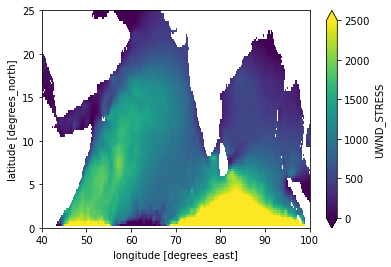

In [70]:
mass_x_summer.plot(vmin=0.0,vmax=2500)

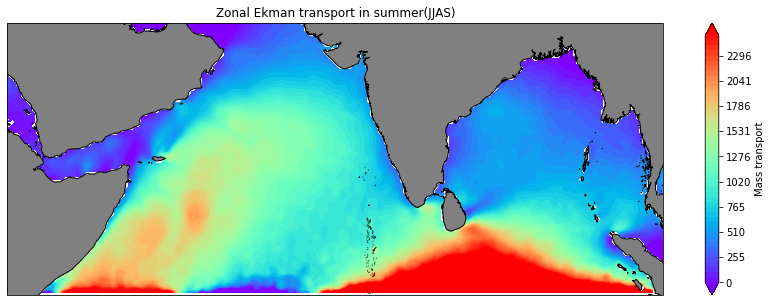

In [86]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = mass_x_summer.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(0,2500,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Zonal Ekman transport in summer(JJAS)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Mass transport")


#### Meridional transport

In [87]:
mass_y_summer = tau_y_summer*0.0
for lat in range(len(tau_y.lat.values)):
    for lon in range(len(tau_y.lon.values)):
        mass_y_summer[lat,lon] = tau_y_summer[lat,lon]/f[lat,lon]

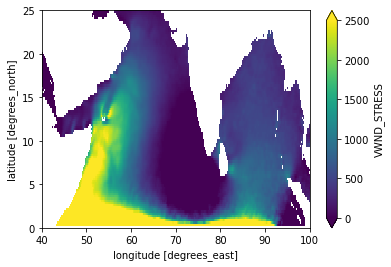

In [88]:
mass_y_summer.plot(vmin=0.0,vmax=2500)

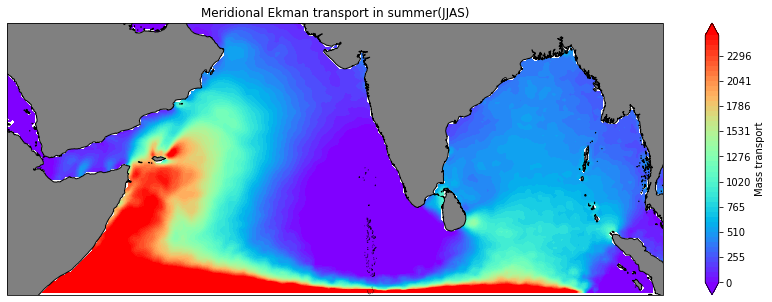

In [89]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = mass_y_summer.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(0,2500,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Meridional Ekman transport in summer(JJAS)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Mass transport")

### Winter

#### Zonal transport

In [90]:
mass_x_winter = tau_x_winter*0.0
for lat in range(len(tau_x.lat.values)):
    for lon in range(len(tau_x.lon.values)):
        mass_x_winter[lat,lon] = tau_x_winter[lat,lon]/f[lat,lon]

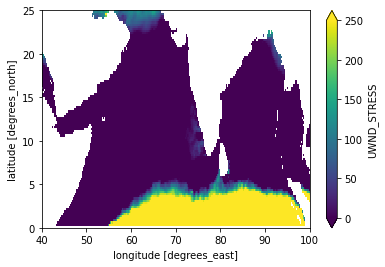

In [93]:
mass_x_winter.plot(vmin=0.0,vmax=250)

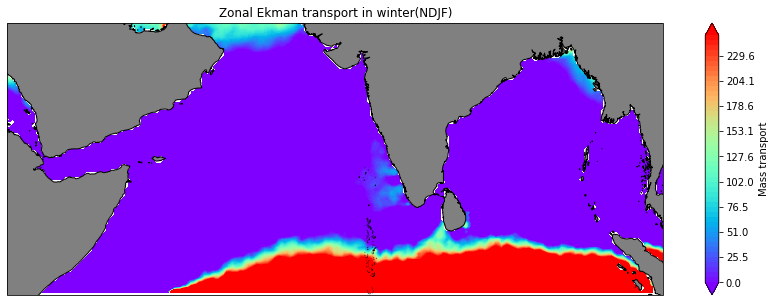

In [96]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = mass_x_winter.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(0,250,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Zonal Ekman transport in winter(NDJF)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Mass transport")


#### Meridional transport

In [97]:
mass_y_winter = tau_y_winter*0.0
for lat in range(len(tau_y.lat.values)):
    for lon in range(len(tau_y.lon.values)):
        mass_y_winter[lat,lon] = tau_y_winter[lat,lon]/f[lat,lon]

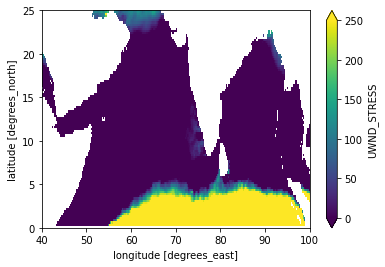

In [98]:
mass_x_winter.plot(vmin=0.0,vmax=250)

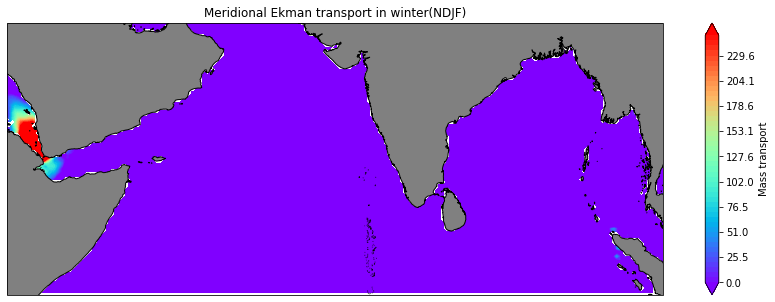

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = mass_y_winter.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(0,25,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Meridional Ekman transport in winter(NDJF)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Mass transport")


### Ekman velocity

#### Summer

In [13]:
rho = 1035

In [14]:
we_summer = tau_x_summer*0.0

for lat in range(len(tau_x_summer.lat.values)-1):
    for lon in range(len(tau_x_summer.lon.values)-1):
        dtauy_dx = (tau_y_summer[lat,lon+1]-tau_y_summer[lat,lon])/(110.*1000.*0.25)
        dtaux_dy = (tau_x_summer[lat+1,lon]-tau_x_summer[lat,lon])/(110.*1000.*0.25)

        we_summer[lat,lon] = (dtauy_dx - dtaux_dy)/(rho * f[lat,lon])

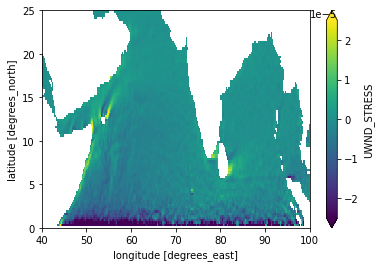

In [17]:
we_summer.plot(vmin=-2.5e-5, vmax=2.5e-5)

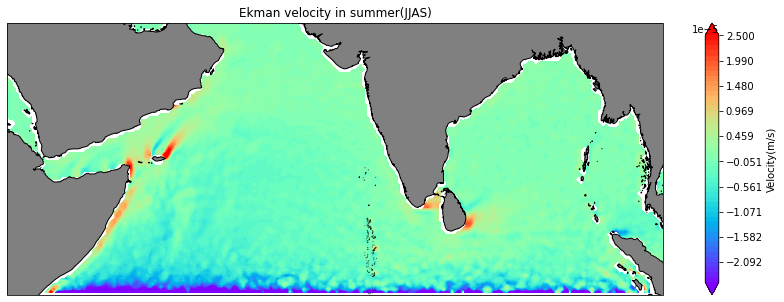

In [18]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = we_summer.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(-2.5e-5,2.5e-5,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Ekman velocity in summer(JJAS)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Velocity(m/s)")

#### Winter

In [19]:
we_winter = tau_x_winter*0.0

for lat in range(len(tau_x_winter.lat.values)-1):
    for lon in range(len(tau_x_winter.lon.values)-1):
        dtauy_dx = (tau_y_winter[lat,lon+1]-tau_y_winter[lat,lon])/(110.*1000.*0.25)
        dtaux_dy = (tau_x_winter[lat+1,lon]-tau_x_winter[lat,lon])/(110.*1000.*0.25)

        we_winter[lat,lon] = (dtauy_dx - dtaux_dy)/(rho * f[lat,lon])

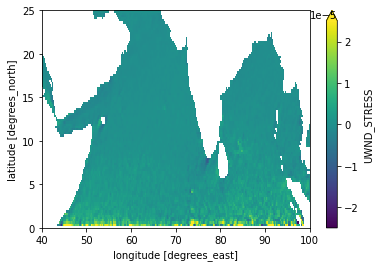

In [20]:
we_winter.plot(vmin=-2.5e-5, vmax=2.5e-5)

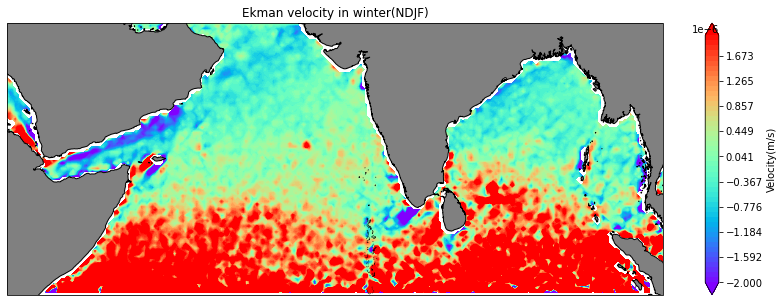

In [22]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
c = we_winter.plot.contourf(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(-0.2e-5,0.2e-5,50), cmap="rainbow", add_colorbar=False
)
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Ekman velocity in winter(NDJF)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(c, ax=ax, label="Velocity(m/s)")